# Flower multi class classifier

This is a multi class image classifier which classifier the 3 flower types rose, lotus and sunflower. The keras pre-trained model InceptionV3 will be used which is trained on ImageNet.

## Exploring the Pre-trained model

In [0]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
local_weights_file = '/content/drive/My Drive/Projects/Rose vs sunflower classifier/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [5]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 17, 17, 768)


## Adding custom layers

In [0]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
# Adding a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
x = layers.Dense (3, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Getting the dataset ready

In [0]:
# Defining the directories where the images are present
base_dir='Rose vs sunflower classifier'

# Directory with the training and testing examples
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training pictures
train_lotus_dir= os.path.join(train_dir,'lotus')
train_rose_dir= os.path.join(train_dir,'rose')
train_sunflower_dir= os.path.join(train_dir,'sunflower')

# Directory with our testing pictures
validation_lotus_dir= os.path.join(validation_dir,'lotus')
validation_rose_dir= os.path.join(validation_dir,'rose')
validation_sunflower_dir= os.path.join(validation_dir,'sunflower')

In [9]:
print('total training lotus images:', len(os.listdir(train_lotus_dir)))
print('total training rose images:', len(os.listdir(train_rose_dir)))
print('total training sunflower images:', len(os.listdir(train_sunflower_dir)))

print('total validation lotus images:', len(os.listdir(validation_lotus_dir)))
print('total validation rose images:', len(os.listdir(validation_rose_dir)))
print('total validation sunflower images:', len(os.listdir(validation_sunflower_dir)))

total training lotus images: 550
total training rose images: 600
total training sunflower images: 600
total validation lotus images: 147
total validation rose images: 212
total validation sunflower images: 241


## Building the model

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [11]:
# Adding data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (300,300))     

validation_generator =  validation_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical', 
                                                          target_size = (300,300))

Found 1750 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


## Training

In [12]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = len(train_dir)//32,
            epochs = 100,
            validation_steps = len(validation_dir)//32,
            verbose = 1)

Epoch 1/100
2/2 [==============================] - 116s 58s/step - loss: 11.0264 - accuracy: 0.3750 - val_loss: 2.2719 - val_accuracy: 0.3750
Epoch 2/100
2/2 [==============================] - 114s 57s/step - loss: 9.2662 - accuracy: 0.2969 - val_loss: 7.8343 - val_accuracy: 0.3438
Epoch 3/100
2/2 [==============================] - 117s 59s/step - loss: 5.7380 - accuracy: 0.3594 - val_loss: 2.5749 - val_accuracy: 0.2969
Epoch 4/100
2/2 [==============================] - 102s 51s/step - loss: 2.9919 - accuracy: 0.4062 - val_loss: 0.7416 - val_accuracy: 0.7344
Epoch 5/100
2/2 [==============================] - 100s 50s/step - loss: 1.4592 - accuracy: 0.6250 - val_loss: 0.4334 - val_accuracy: 0.8438
Epoch 6/100
2/2 [==============================] - 111s 55s/step - loss: 0.7331 - accuracy: 0.7031 - val_loss: 0.7307 - val_accuracy: 0.7031
Epoch 7/100
2/2 [==============================] - 51s 25s/step - loss: 1.1400 - accuracy: 0.5938 - val_loss: 0.7769 - val_accuracy: 0.7143
Epoch 8/100
2

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2/2 [==============================] - 32s 16s/step - loss: 1.9390 - accuracy: 0.5156 - val_loss: 0.1394 - val_accuracy: 0.9844
Epoch 19/100
2/2 [==============================] - 31s 16s/step - loss: 0.3330 - accuracy: 0.8438 - val_loss: 0.2674 - val_accuracy: 0.8750
Epoch 20/100
2/2 [==============================] - 28s 14s/step - loss: 0.3799 - accuracy: 0.8750 - val_loss: 0.3127 - val_accuracy: 0.8438
Epoch 21/100
2/2 [==============================] - 38s 19s/step - loss: 0.3610 - accuracy: 0.8438 - val_loss: 0.6386 - val_accuracy: 0.7344
Epoch 22/100
2/2 [==============================] - 27s 14s/step - loss: 1.0525 - accuracy: 0.6250 - val_loss: 0.4184 - val_accuracy: 0.8438
Epoch 23/100
2/2 [==============================] - 30s 15s/step - loss: 0.7619 - accuracy: 0.7656 - val_loss: 0.2900 - val_accuracy: 0.8438
Epoch 24/100
2/2 [==============================] - 31s 15s/step - loss: 0.4263 - accuracy: 0.8125 - val_loss: 0.4024 - val_accuracy: 0.8906
Epoch 25/100
2/2 [========

## Evaluating Accuracy and Loss for the Model

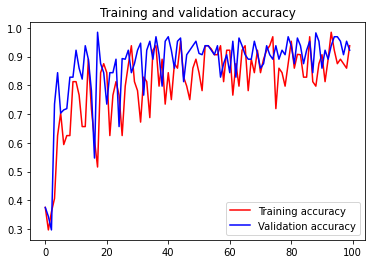

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()